In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KernelDensity
import ipywidgets as widgets

(50, 10000)


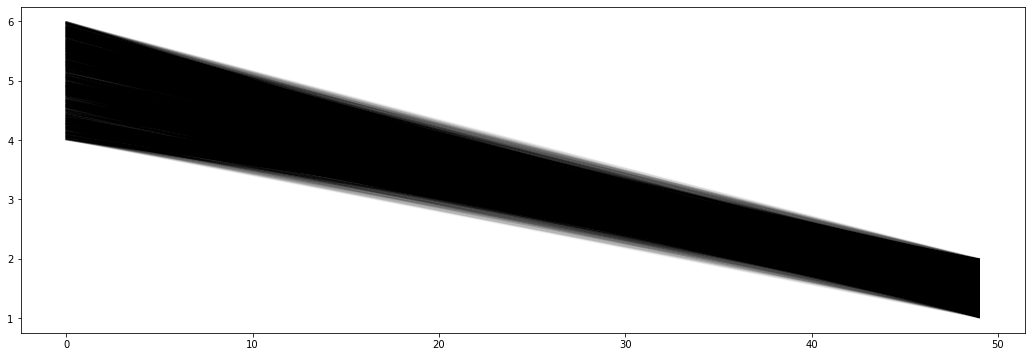

In [10]:
x1 = np.random.uniform(4,6, 10000)
x2 = np.random.uniform(1,2, 10000)

T_s = 50
alpha = np.linspace(0, 1, T_s)
x = np.array([a * x2 + (1-a) * x1 for a in alpha])

print(x.shape)

plt.figure(figsize=(18,6))
plt.plot(x[:200,:], c='k', alpha=0.01)
plt.show()

In [14]:
T_v = 100
pdfs = np.empty((T_s, T_v))
for s in range(T_s):
    kde = KernelDensity(kernel='tophat', bandwidth=0.1).fit(x[s,:].reshape((-1,1)))
    x_plot = np.linspace(-1, 8, T_v)
    pdfs[s,:] = np.exp(kde.score_samples(x_plot.reshape((-1,1))))

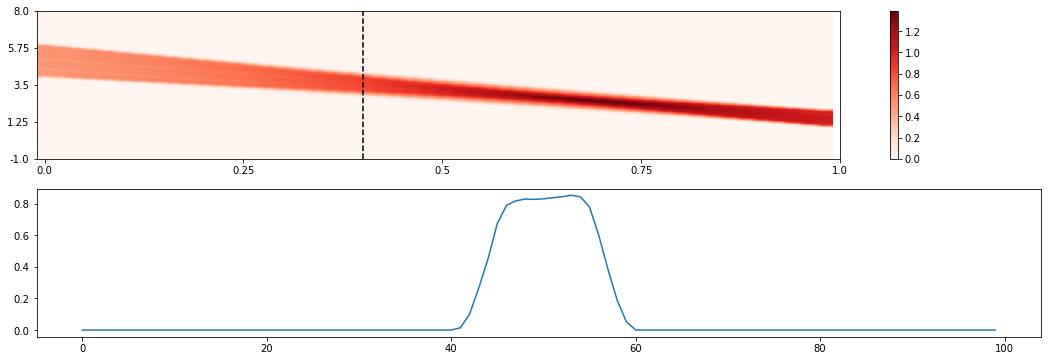

In [15]:
s = 20
plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
plt.imshow(pdfs.T, cmap='Reds', aspect='auto', origin='lower')
plt.colorbar()
plt.vlines(s, 0, T_v, colors='k', ls='dashed')
plt.xticks(np.linspace(0,T_s,5), np.linspace(0,1,5))
plt.yticks(np.linspace(0,T_v,5), np.linspace(-1,8,5))
plt.ylim(0,T_v)

plt.subplot(2,1,2)
plt.plot(pdfs[s,:])

plt.show()

In [18]:
@widgets.interact(s=(0,T_s-1,1))
def show_pdf(s=0):
    plt.figure(figsize=(18,6))
    plt.subplot(2,1,1)
    plt.imshow(pdfs.T, cmap='Reds', aspect='auto', origin='lower')
    plt.colorbar()
    plt.vlines(s, 0, T_v, colors='k', ls='dashed')
    plt.xticks(np.linspace(0,T_s,5), np.linspace(0,1,5))
    plt.yticks(np.linspace(0,T_v,5), np.linspace(-1,8,5))
    plt.ylim(0,T_v)

    plt.subplot(2,1,2)
    plt.plot(pdfs[s,:])
    plt.ylim(0,2)

    plt.show()

interactive(children=(IntSlider(value=0, description='s', max=49), Output()), _dom_classes=('widget-interact',…